In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from IPython import display as dp
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.5)
sns.despine()

%matplotlib notebook

Text(0.5, 7.5, 'Test fault resistance, p.u.')

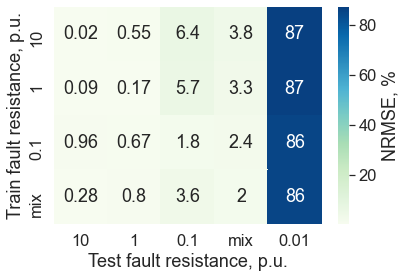

In [2]:
lstm_results = [[0.02, 0.55, 6.42, 3.79, 87.33],
                [0.09, 0.17, 5.74, 3.30, 87.02],
                [0.96, 0.67, 1.77, 2.40, 85.94],
                [0.28, 0.80, 3.62, 1.99, 85.81]]

lstm_results = np.array(lstm_results)
nrm = lstm_results.mean(axis=0)
ax = sns.heatmap(lstm_results, annot=True, cmap='GnBu',
# ax = sns.heatmap((lstm_results / nrm - 1).round(2), annot=True, cmap='GnBu',
                 xticklabels=[10, 1, 0.1, 'mix', 0.01], yticklabels=[10, 1, 0.1, 'mix'],
                 # cbar_kws={'label': 'divergence from mean'})
                 cbar_kws={'label': 'NRMSE, %'})
plt.ylabel('Train fault resistance, p.u.')
plt.xlabel('Test fault resistance, p.u.')

In [ ]:
lstm_rnd_on_std_results = {'mix': [0.04, 0.38, 3.72, 1.97, 91.89]}

In [ ]:
lstm_rnd_on_rnd_results = {'mix': [0.29, 0.50, 3.57, 0]}

In [ ]:
node_sparse_results = [[0.85, 1.01, 5.16, 3.22, 66.71],
                       [0.79, 0.96, 5.13, 3.19, 66.73],
                       [1.26, 1.34, 5.25, 3.38, 66.85],
                       [0.96, 1.10, 5.18, 3.30, 91.29]]
node_sparse_results = np.array(node_sparse_results)
nrm = node_sparse_results.mean(axis=0)
ax = sns.heatmap((node_sparse_results / nrm - 1).round(2), annot=True, cmap='GnBu',
                 xticklabels=[10, 1, 0.1, 'mix', 0.01], yticklabels=[10, 1, 0.1, 'mix'],
                 cbar_kws={'label': 'divergence from mean'})
plt.ylabel('Train fault resistance, p.u.')
plt.xlabel('Test fault resistance, p.u.')

In [ ]:
node_interm_results = {'10': [0, 0.98, 5.14, 3.20, 66.72],
                       '1': [0.82, 0, 5.14, 3.20, 66.72],
                       '0.1': [1.27, 1.35, 0, 3.39, 66.85],
                       'mix': [, , , 3.29, ]}

In [ ]:
node_sparse_rnd_on_std_results = {'10': [0.82, 0.99, 5.15, 3.20, 66.71],
                                  '1': [, , , , 66.73],
                                  '0.1': [, , , , 66.85],
                                  'mix': []}

In [ ]:
node_sparse_rnd_on_rnd_results = {'mix': [, , , 3.42]}

In [ ]:
node_interm_rnd_on_std_results = {'10': [0.80, 0.98, 5.14, 3.20, 66.72],
                                  '1': [, , , , 66.73],
                                  '0.1': [, , , , 66.85],
                                  'mix': []}

In [ ]:
node_interm_rnd_on_rnd_results = {'mix': []}

In [ ]:
# 10, 1, 0.1, mix, 0.01, in "percent"
physical_pre_results = {'10': [0, 2.34, 24.87, , 172.50],
                        'mix': [0.30, 2.26, , 154.45]}

In [ ]:
physical_std_on_rnd_results = {'mix': []}

In [34]:
import pickle
with open('/Users/nickstulov/Desktop/Work/GenLearn/results.pkl', 'rb') as f:
    true, pred = pickle.load(f)

In [35]:
with open('/Users/nickstulov/Desktop/Work/GenLearn/mix_scaler.pkl', 'rb') as f:
    sc = pickle.load(f)

/Users/nickstulov/.virtualenvs/torch1venv3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator StandardScaler from version 0.21.3 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [36]:
pred = pred.numpy().transpose(1, 0, 2)
true = true.numpy().transpose(1, 0, 2)
true_ = np.concatenate(true, 0)
pred_ = np.concatenate(pred, 0)
# stacked = sc.inverse_transform(np.concatenate([true, pred], -1))
# pred_ = stacked[:, 2:]
# stacked = sc.inverse_transform(np.concatenate([pred, true], -1))
# true_ = stacked[:, 2:]

In [30]:
pred_.shape

(15360, 2)

In [5]:
true = true_.reshape((150001, 100, 2))
pred = pred_.reshape((150001, 100, 2))

ValueError: cannot reshape array of size 61440 into shape (150001,100,2)

In [37]:
sz = 1024 // 2
true = true_.reshape((sz * 30, 2))[:(sz * 30) // 150 * 150].reshape(((sz * 30) // 150, 150, 2))

In [38]:
pred = pred_.reshape((sz * 30, 2))[:(sz * 30) // 150 * 150].reshape(((sz * 30) // 150, 150, 2))

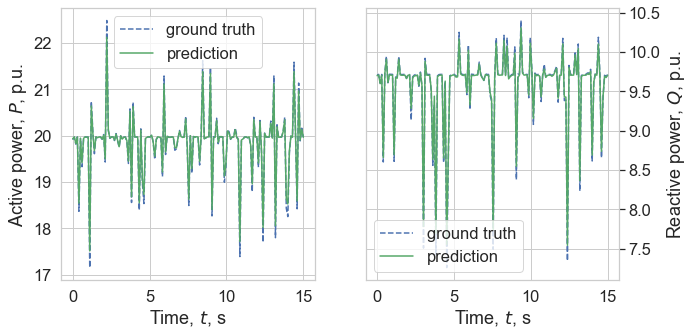

In [15]:
i = np.random.randint(50)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
t = np.linspace(0, 15, 150)
ax[0].plot(t, true[i, :, 0], '--', label='ground truth')
ax[0].plot(t, pred[i, :, 0], 'g', label='prediction')
ax[0].set_xlabel('Time, $t$, s')
ax[0].set_ylabel('Active power, $P$, p.u.')
ax[0].legend()
ax[1].plot(t, true[i, :, 1], '--', label='ground truth')
ax[1].plot(t, pred[i, :, 1], 'g', label='prediction')
ax[1].set_xlabel('Time, $t$, s')
ax[1].set_ylabel('Reactive power, $Q$, p.u.')
ax[1].legend(loc='lower left')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

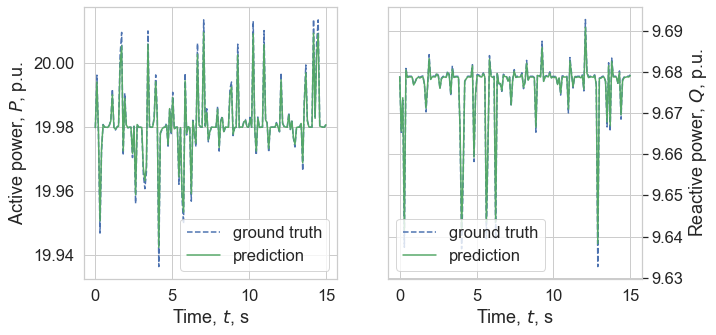

In [21]:
i = np.random.randint(50)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
t = np.linspace(0, 15, 150)
ax[0].plot(t, true[i, :, 0], '--', label='ground truth')
ax[0].plot(t, pred[i, :, 0], 'g', label='prediction')
ax[0].set_xlabel('Time, $t$, s')
ax[0].set_ylabel('Active power, $P$, p.u.')
ax[0].legend()
ax[1].plot(t, true[i, :, 1], '--', label='ground truth')
ax[1].plot(t, pred[i, :, 1], 'g', label='prediction')
ax[1].set_xlabel('Time, $t$, s')
ax[1].set_ylabel('Reactive power, $Q$, p.u.')
ax[1].legend(loc='lower left')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

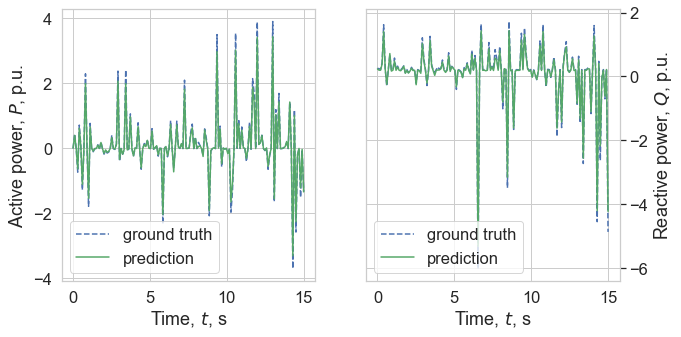

In [39]:
i = np.random.randint(50)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
t = np.linspace(0, 15, 150)
ax[0].plot(t, true[i, :, 0], '--', label='ground truth')
ax[0].plot(t, pred[i, :, 0], 'g', label='prediction')
ax[0].set_xlabel('Time, $t$, s')
ax[0].set_ylabel('Active power, $P$, p.u.')
ax[0].legend()
ax[1].plot(t, true[i, :, 1], '--', label='ground truth')
ax[1].plot(t, pred[i, :, 1], 'g', label='prediction')
ax[1].set_xlabel('Time, $t$, s')
ax[1].set_ylabel('Reactive power, $Q$, p.u.')
ax[1].legend(loc='lower left')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

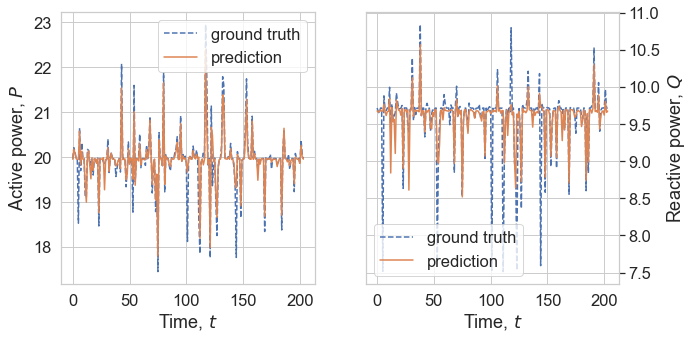

In [26]:
i = np.random.randint(50)
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(true[:, i, 0], '--', label='ground truth')
ax[0].plot(pred[:, i, 0], label='prediction')
ax[0].set_xlabel('Time, $t$')
ax[0].set_ylabel('Active power, $P$')
ax[0].legend()
ax[1].plot(true[:, i, 1], '--', label='ground truth')
ax[1].plot(pred[:, i, 1], label='prediction')
ax[1].set_xlabel('Time, $t$')
ax[1].set_ylabel('Reactive power, $Q$')
ax[1].legend(loc='lower left')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

In [ ]:
with open('/Users/nickstulov/Downloads/lstm_rnd_mix_scaler.pkl', 'rb') as f:
    sc = pickle.load(f)

In [ ]:
pred = pred.transpose(1, 0, 2)
true = true.transpose(1, 0, 2)
true_ = np.concatenate(true, 0)
pred_ = np.concatenate(pred, 0)
#stacked = sc.inverse_transform(np.concatenate([true, pred], -1))
#pred_ = stacked[:, 2:]
#stacked = sc.inverse_transform(np.concatenate([pred, true], -1))
#true_ = stacked[:, 2:]
err = [np.sqrt(np.sum((t - p) ** 2)) / np.sqrt(np.sum(t ** 2)) \
       for t, p in zip(true_[:len(true_)//151*151].reshape((len(true_)//151, 151, 2)), 
                       pred_[:len(true_)//151*151].reshape((len(true_)//151, 151, 2)))]

print('\n'.join(['RMSE',
                 'mean %.4f' % np.mean(err).round(4),
                 'median %.4f' % np.median(err).round(4),
                 'max %.4f' % np.max(err).round(4),
                 'min %.4f' % np.min(err).round(4),
                 '95%% percentile %.4f' % np.percentile(err, 95).round(4)]))